
Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
         m:      1.00 [   -10.00,     10.00] N( 0.00e+00,      inf)
         b:     -5.00 [   -10.00,    100.00] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 5000 of 5000 complete in 3.9 sec

------------------------------
      name:      mean       std    MC_err       tau    geweke
         m:      2.02      0.03  3.21e-03     43.89      1.00
         b:     -3.05      0.08  7.93e-03     42.58      0.99
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 1.56%
Stage 2: 8.80%
Net    : 10.36% -> 518/5000
---------------
Chain provided:
Net    : 11.07% -> 332/3000
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only provided a subset of the chain,
e.g., removed the first part for burnin-in.
------------------------------


C:\Users\Acer_swift3\AppData\Local\Temp\ipykernel_17888\2701614383.py:63: DeprecationWarning: Call to deprecated function (or staticmethod) plot_density_panel. (New function: "from pymcmcstat.mcmcplot import plot_density_panel") -- Deprecated since version 1.9.0.
  mcpl.plot_density_panel ( chain [ burnin : ,:] , names )
C:\Users\Acer_swift3\AppData\Local\Temp\ipykernel_17888\2701614383.py:64: DeprecationWarning: Call to deprecated function (or staticmethod) plot_chain_panel. (New function:"from pymcmcstat.mcmcplot import plot_chain_panel") -- Deprecated since version 1.9.0.
  mcpl.plot_chain_panel ( chain [ burnin : ,:] , names )
C:\Users\Acer_swift3\AppData\Local\Temp\ipykernel_17888\2701614383.py:65: DeprecationWarning: Call to deprecated function (or staticmethod) plot_pairwise_correlation_panel. (New function: "from pymcmcstat.mcmcplot import plot_pairwise_correlation_panel") -- Deprecated since version 1.9.0.
  mcpl.plot_pairwise_correlation_panel ( chain [ burnin : ,:] , names )

Generating credible/prediction intervals:


Interval generation complete



([<Figure size 700x500 with 1 Axes>], [<AxesSubplot:>])

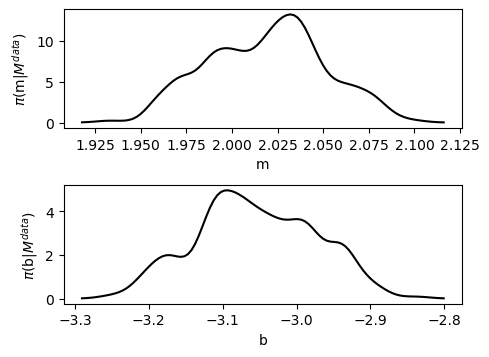

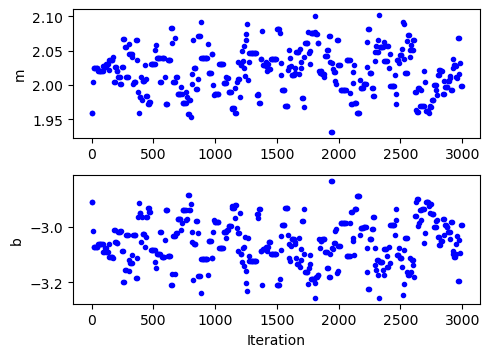

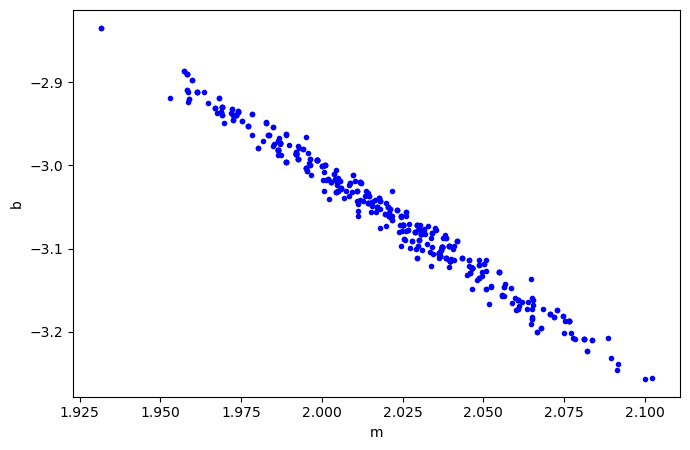

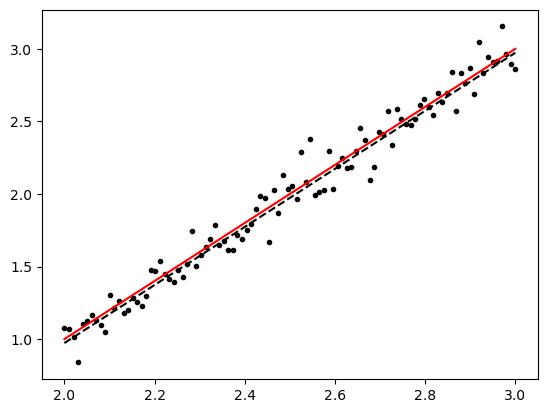

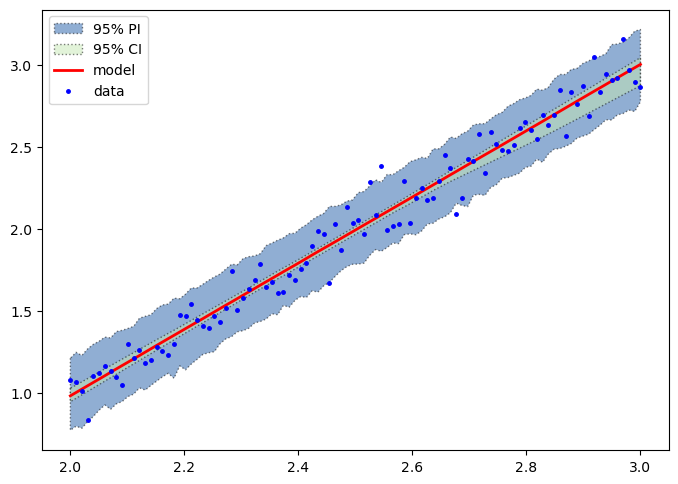

In [11]:
# import required packages
import numpy as np
from pymcmcstat.MCMC import MCMC
import matplotlib.pyplot as plt
from pymcmcstat.plotting.MCMCPlotting import plot_density_panel


# define test model function
def test_modelfun(xdata, theta):
    m = theta [0]
    b = theta [1]
    nrow , ncol = xdata.shape
    y = np . zeros ([ nrow ,1])
    y[: ,0] = m * xdata.reshape(nrow ,) + b
    return y


def test_ssfun (theta, data):
    xdata = data.xdata [0]
    ydata = data.ydata [0]
    # eval model
    ymodel = test_modelfun ( xdata , theta )
    # calc sos
    ss = sum (( ymodel [: ,0] - ydata [: ,0]) **2)
    return ss


# Initialize MCMC object
mcstat = MCMC ()
# Add data
nds = 100
x = np.linspace (2, 3, num = nds)
x = x.reshape (nds ,1)
m = 2 # slope
b = -3 # offset
noise = 0.1* np.random.standard_normal(x.shape)
y = m * x + b + noise
mcstat.data.add_data_set(x, y)


# initialize parameter array
mcstat.parameters.add_model_parameter(name = 'm', theta0 = 1. , minimum = -10 , maximum = 10)
mcstat.parameters.add_model_parameter(name = 'b', theta0 = -5. , minimum = -10 , maximum = 100)
# update simulation options
mcstat.simulation_options.define_simulation_options (nsimu = int(5.0e3),
    updatesigma = 1 , method = 'dram', adaptint = 100 , verbosity = 1 , waitbar = 1)


# update model settings
mcstat.model_settings.define_model_settings(sos_function = test_ssfun)
# Run mcmcrun
mcstat.run_simulation ()
# Extract results
results = mcstat.simulation_results.results
chain = results ['chain']
s2chain = results ['s2chain']
sschain = results ['sschain']
names = results ['names']

# define burnin
burnin = 2000
# display chain statistics
mcstat.chainstats (chain[burnin: ,:], results)
# generate mcmc plots
mcpl = mcstat.mcmcplot # initialize plotting methods
mcpl.plot_density_panel (chain[burnin: ,:], names)
mcpl.plot_chain_panel (chain[ burnin : ,:], names)
mcpl.plot_pairwise_correlation_panel (chain[burnin : ,:], names)

# plot data & model
plt.figure()
plt.plot(x, y, '.k')
plt.plot (x , m * x + b , '-r')
model = test_modelfun (x, np.mean(results ['chain'] ,0))
plt.plot(x, model[: ,0], '--k')
# generate prediction intervals
def pred_modelfun(preddata , theta):
    return test_modelfun(preddata.xdata[0], theta)
mcstat.PI.setup_prediction_interval_calculation(results = results, data = mcstat.data, modelfunction = pred_modelfun)
mcstat.PI.generate_prediction_intervals()
# plot prediction intervals
mcstat.PI.plot_prediction_intervals(adddata = True)